In [39]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [50]:
bt = pd.read_csv("C:\\Users\\Dell\\Downloads\\BHARTIARTL.csv", index_col = 0)

In [100]:
bt.head()

,Open,High,Low,Close,Adj Close,Volume,MA10,MA50,Shares,Close1,MA200
Date,,,,,,,,,,,
2019-06-10,354.799988,364.649994,353.649994,363.450012,363.450012,5882086.0,NaN,NaN,0,363.250000,NaN
2019-06-11,363.000000,366.950012,358.250000,363.250000,363.250000,5563691.0,NaN,NaN,0,359.899994,NaN
2019-06-12,362.399994,362.399994,357.100006,359.899994,359.899994,2815172.0,NaN,NaN,0,363.750000,NaN
2019-06-13,357.049988,364.950012,357.049988,363.750000,363.750000,3768622.0,NaN,NaN,0,353.299988,NaN
2019-06-14,362.549988,362.950012,351.649994,353.299988,353.299988,5075586.0,NaN,NaN,0,344.000000,NaN


In [96]:
bt['MA10'] = bt['Close'].rolling(10).mean()
bt['MA50'] = bt['Close'].rolling(50).mean()
bt['MA200'] = bt['Close'].rolling(200).mean()

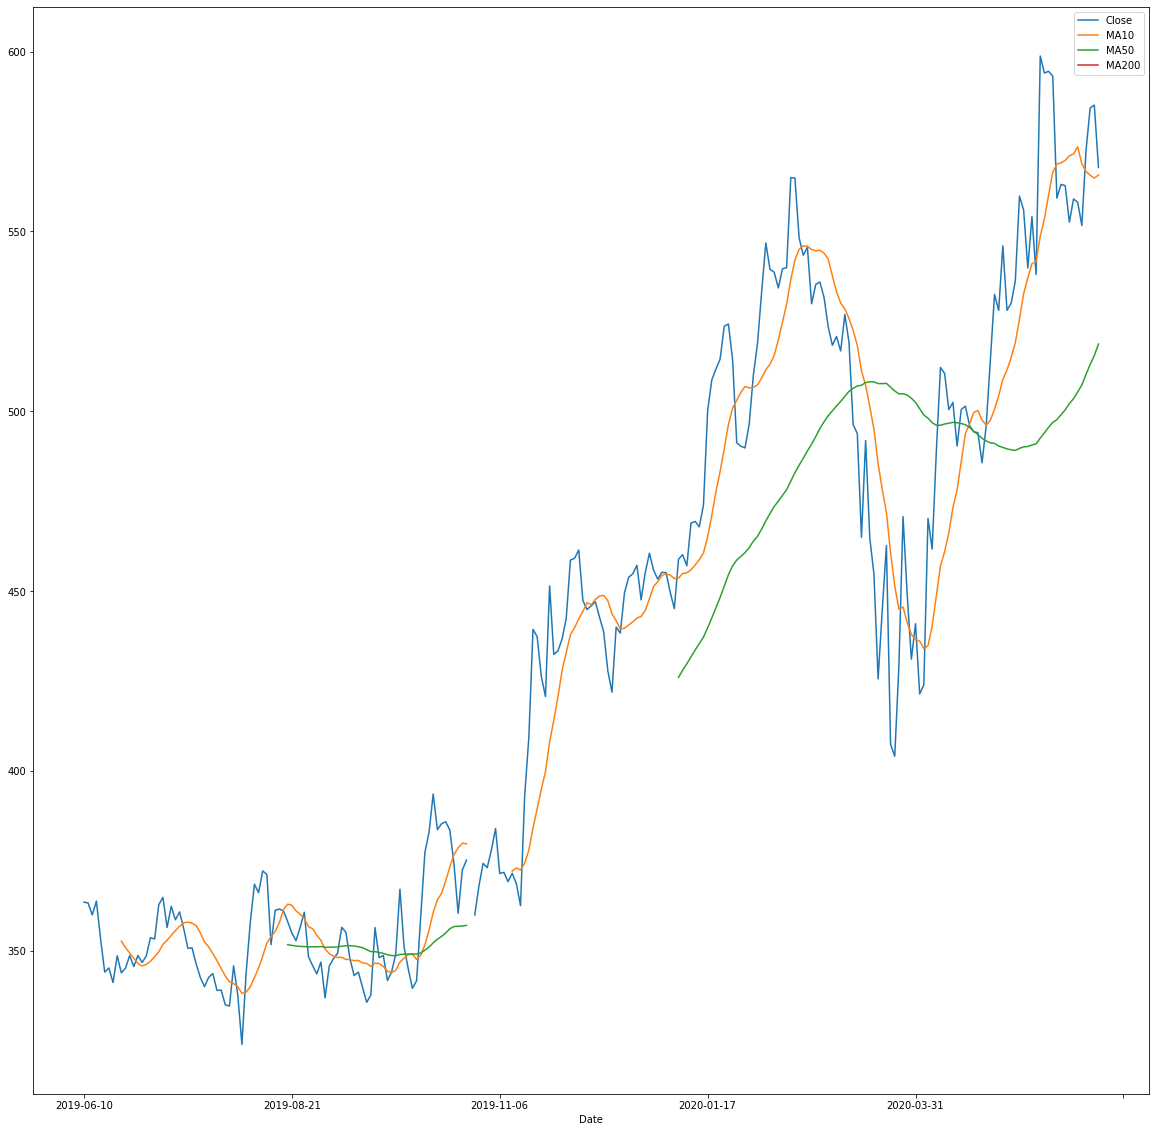

In [98]:
plt.figure(figsize = (20,20))
bt['Close'].plot(legend = True)
bt['MA10'].plot(legend = True)
bt['MA50'].plot(legend = True)
bt['MA200'].plot(legend = True)
plt.show()

In [76]:
bt['Shares'] = [1 if bt.loc[ei ,'MA10']>bt.loc[ei , 'MA50'] else 0 for ei in bt.index ]

In [101]:
bt['Close1'] = bt['Close'].shift(-1)

In [105]:
bt['Profit'] = [bt.loc[ei,'Close1'] - bt.loc[ei,'Close'] if bt.loc[ei,'Shares'] == 1 else 0 for ei in bt.index]

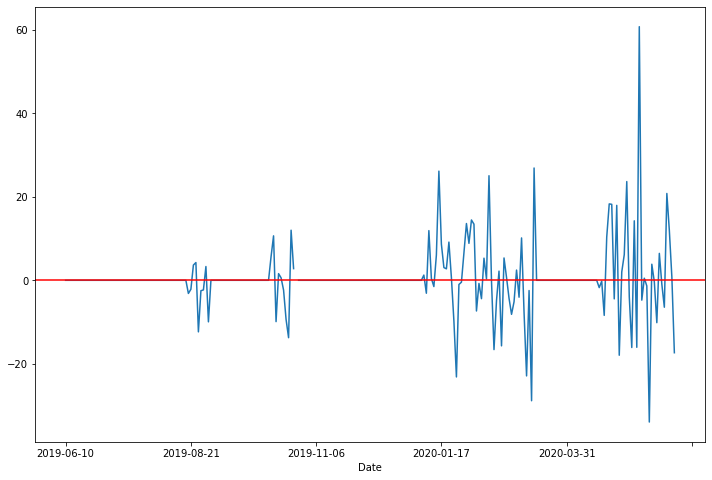

In [140]:
plt.figure(figsize = (12,8))
bt['Profit'].plot()
plt.axhline(y = 0, color = 'red')

In [156]:
bt['Signal_Based'] = bt['Profit'].cumsum()

In [157]:
bt.tail()

,Open,High,Low,Close,Adj Close,Volume,MA10,MA50,Shares,Close1,MA200,Profit,Wealth,long,Wealth2,Passive_strategy,Signal_Based
Date,,,,,,,,,,,,,,,,,
2020-06-03,568.000000,568.299988,549.250000,551.650024,551.650024,29234914.0,568.829993,507.293997,1,572.450012,NaN,20.799988,86.150024,20.799988,224.250000,224.250000,86.150024
2020-06-04,552.299988,585.400024,549.549988,572.450012,572.450012,29454264.0,566.669995,510.231997,1,584.349976,NaN,11.899964,98.049988,11.899964,236.149964,236.149964,98.049988
2020-06-05,584.000000,590.000000,567.450012,584.349976,584.349976,47873027.0,565.649994,513.023997,1,585.150024,NaN,0.800048,98.850036,0.800048,236.950012,236.950012,98.850036
2020-06-08,588.000000,593.700012,579.200012,585.150024,585.150024,20429990.0,564.844995,515.473997,1,567.799988,NaN,-17.350036,81.500000,-17.350036,219.599976,219.599976,81.500000
2020-06-09,580.000000,591.650024,565.700012,567.799988,567.799988,14934500.0,565.699994,518.682997,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [159]:
print("Total profit you makes against unit share is",bt.loc[bt.index[-2],'Signal_Based'])
print('Total money you spent i.e cost of 1 share ', bt.loc[bt.index[0],'Close'])

Total profit you makes against unit share is 81.5
Total money you spent i.e cost of 1 share  363.450012


In [160]:
percentage_gain =  bt.loc[bt.index[-2],'Signal_Based']/bt.loc[bt.index[0],'Close']*100

In [161]:
print(percentage_gain,'%')

22.423991555680566 %


In [162]:
long_percentage_gain = (bt.loc[bt.index[-1],'Close'] - bt.loc[bt.index[0],'Close'])/bt.loc[bt.index[0],'Close']*100

In [163]:
print(long_percentage_gain,'%')

56.2250568862273 %


In [165]:
#graphically
bt['long'] = bt['Close1'] - bt['Close']

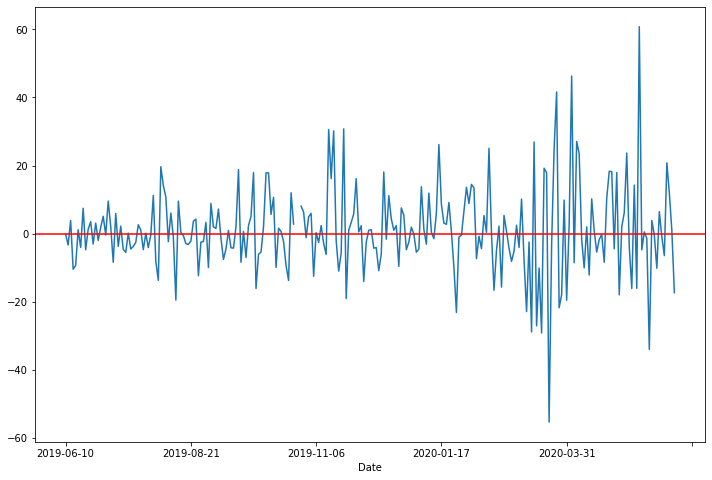

In [166]:
plt.figure(figsize = (12,8))
bt['long'].plot()
plt.axhline(y = 0, color = 'red')

In [149]:
bt['Passive_strategy'] = bt['long'].cumsum()

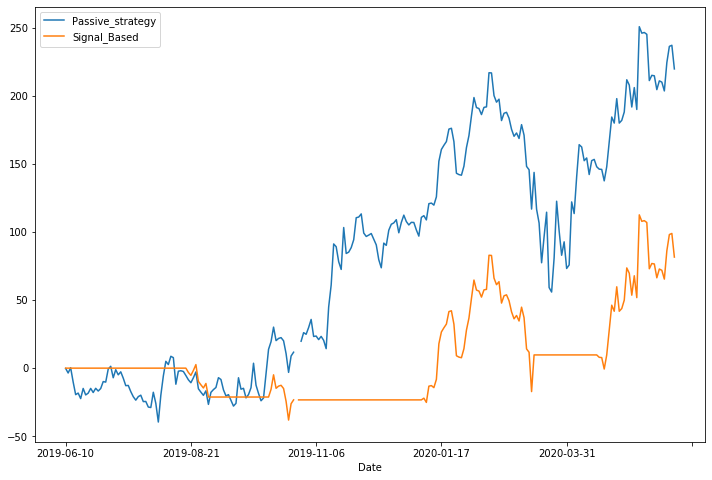

In [168]:
plt.figure(figsize = (12,8))
bt['Passive_strategy'].plot(legend = True)
bt['Signal_Based'].plot(legend = True)